load data

In [20]:
import urllib.request
import json
import numpy as np
import pandas as pd

In [21]:
data_url = 'data/processed_data/TS_quality_run5k.json'
json_data = list()
TS_run = pd.read_json(data_url)

In [22]:
data_url = 'data/processed_data/quality_run8k.json'
json_data = list()
IC_run = pd.read_json(data_url)

In [23]:
IC_run = IC_run.sample(n=5500).reset_index()

In [24]:
decks = TS_run.master_deck.tolist() + IC_run.master_deck.tolist()

In [25]:
IC_run.columns

Index(['level_0', 'index', 'gold_per_floor', 'floor_reached', 'playtime',
       'items_purged', 'score', 'play_id', 'local_time', 'is_ascension_mode',
       'campfire_choices', 'neow_cost', 'seed_source_timestamp',
       'circlet_count', 'master_deck', 'relics', 'potions_floor_usage',
       'damage_taken', 'seed_played', 'potions_obtained', 'is_trial',
       'path_per_floor', 'character_chosen', 'items_purchased',
       'campfire_rested', 'item_purchase_floors', 'current_hp_per_floor',
       'gold', 'neow_bonus', 'is_prod', 'is_daily', 'chose_seed',
       'campfire_upgraded', 'win_rate', 'timestamp', 'path_taken',
       'build_version', 'purchased_purges', 'victory', 'max_hp_per_floor',
       'card_choices', 'player_experience', 'relics_obtained', 'event_choices',
       'is_beta', 'boss_relics', 'items_purged_floors', 'is_endless',
       'potions_floor_spawned', 'killed_by', 'ascension_level',
       'special_seed'],
      dtype='object')

In [26]:
print(decks[0])

['Defend_G', 'Defend_G', 'Defend_G', 'Defend_G', 'Survivor', 'Neutralize+1', 'Backstab+1', 'Backstab+1', 'Deadly Poison+1', 'Deadly Poison+1', 'Escape Plan', 'Envenom+1', 'Dagger Spray', 'Corpse Explosion+1', 'Backflip+1', 'After Image', 'Footwork', 'Bane']


In [27]:
len(decks)

10789

In [28]:
def upgrade_lst(lst):
  new_lst = list()
  for item in lst:
    if(item != 'Searing Blow'):
      new_lst.append(item+'+1')
  return new_lst

In [29]:
def get_ALL_IC_CARD():
  IC_ATTACK_CARDS = ["Strike_R", "Bash", "Anger", "Body Slam", "Clash", "Cleave", "Clothesline", "Headbutt", "Heavy Blade", "Iron Wave", "Perfected Strike", "Pommel Strike", "Sword Boomerang", "Thunderclap", "Twin Strike", "Wild Strike", "Blood for Blood", "Carnage", "Dropkick", "Hemokinesis", "Pummel", "Rampage", "Reckless Charge", "Searing Blow", "Sever Soul", "Uppercut", "Whirlwind", "Bludgeon", "Feed", "Fiend Fire", "Immolate", "Reaper"]
  IC_SKILL_CARDS = ["Defend_R", "Armaments", "Flex", "Havoc", "Shrug It Off", "True Grit", "Warcry", "Battle Trance", "Bloodletting", "Burning Pact", "Disarm", "Dual Wield", "Entrench", "Flame Barrier", "Ghostly Armor", "Infernal Blade", "Intimidate", "Power Through", "Rage", "Second Wind", "Seeing Red", "Sentinel", "Shockwave", "Spot Weakness", "Double Tap", "Exhume", "Impervious", "Limit Break", "Offering"]
  IC_POWER_CARDS = ["Combust", "Dark Embrace", "Evolve", "Feel No Pain", "Fire Breathing", "Inflame", "Metallicize", "Rupture", "Barricade", "Berserk", "Brutality", "Corruption", "Demon Form", "Juggernaut"]
  IRONCLAD_CARDS = IC_ATTACK_CARDS + IC_SKILL_CARDS + IC_POWER_CARDS
  return IRONCLAD_CARDS + upgrade_lst(IRONCLAD_CARDS)

In [30]:
def get_ALL_COLORLESS_CARD():
    COLORLESS_CARDS = ["Dramatic Entrance", "Flash of Steel", "Mind Blast", "Swift Strike", "HandOfGreed", "Bite", "Expunger", "Ritual Dagger", "Shiv", "Smite", "Through Violence", "Bandage Up", "Blind", "Dark Shackles", "Deep Breath", "Discovery", "Enlightenment", "Finesse", "Forethought", "Good Instincts", "Impatience", "Jack Of All Trades", "Madness", "Panacea", "PanicButton", "Purity", "Trip", "Apotheosis", "Chrysalis", "Master of Strategy", "Metamorphosis", "Secret Technique", "Secret Weapon", "The Bomb", "Thinking Ahead", "Transmutation", "Violence", "Apparition", "Beta", "Insight", "J.A.X.", "Miracle", "Safety", "Magnetism", "Mayhem", "Panache", "Sadistic Nature"]
    CURSE_CARDS = ["AscendersBane", "Clumsy", "Curse of the Bell", "Decay", "Doubt", "Injury", "Necronomicurse", "Normality", "Pain", "Parasite", "Pride", "Regret", "Shame", "Writhe"]
    NOISE = ['Expunger', 'Ritual Dagger', 'Shiv', 'Smite', 'Through Violence',
       'Apparition', 'Beta', 'Insight', 'Miracle', 'Safety',
       'Curse of the Bell', 'Pride', 'Expunger+1', 'Ritual Dagger+1', 'Shiv+1',
       'Smite+1', 'Through Violence+1', 'Apparition+1', 'Beta+1', 'Insight+1',
       'Miracle+1', 'Safety+1']
    cards = COLORLESS_CARDS + upgrade_lst(COLORLESS_CARDS) + CURSE_CARDS 
    return [card for card in cards if card not in NOISE] 

In [31]:
def get_ALL_TS_CARD():
    TS_ALL_CARD =[ 	
        "Strike_G" , "Defend_G" ,"Neutralize" , "Survivor",
        "Bane", "Dagger Spray", "Dagger Throw", "Flying Knee", "Poisoned Stab", "Quick Slash", "Slice", "Sneaky Strike", "Sucker Punch",
        "All Out Attack", "Backstab", "Choke", "Dash", "Endless Agony", "Eviscerate", "Finisher", "Flechettes", "Heel Hook", "Masterful Stab", "Predator", "Riddle with Holes", "Skewer",
        "Die Die Die", "Glass Knife", "Grand Finale", "Unload",
        "Acrobatics", "Backflip", "Blade Dance", "Cloak And Dagger", "Deadly Poison", "Deflect", "Dodge and Roll", "Outmaneuver", "PiercingWail", "Prepared",
        "Blur", "Bouncing Flask", "Calculated Gamble", "Catalyst", "Concentrate", "Crippling Cloud", "Distraction", "Escape Plan", "Expertise", "Leg Sweep", "Reflex", "Setup", "Tactician", "Terror",
        "Adrenaline", "Alchemize", "Bullet Time", "Burst", "Corpse Explosion", "Doppelganger", "Malaise", "Nightmare", "Phantasmal Killer", "Storm of Steel",
        "Accuracy", "Caltrops", "Footwork", "Infinite Blades", "Noxious Fumes", "Well Laid Plans",
        "A Thousand Cuts", "After Image", "Envenom", "Tools of the Trade", "Wraith Form v2" ,
        "Underhanded Strike" , 'Crippling Poison' , 'Venomology' , 'Night Terror' ## beta name
    ]
    return TS_ALL_CARD + upgrade_lst(TS_ALL_CARD)

In [32]:
def get_ALL_CARD():
    NOISE = ['Sneaky Strike', 'Riddle with Holes',
       'Cloak and Dagger', 'Crippling Cloud', 'Alchemize',
       'Nightmare', 'Sneaky Strike+1',
        'Riddle with Holes+1', 'Cloak and Dagger+1',
        'Crippling Cloud+1', 'Alchemize+1', 'Nightmare+1',
        'Wraith Form v2+1','Underhanded Strike+1','Venomology+1','Night Terror+1'
        ]
    allCard = get_ALL_IC_CARD() + get_ALL_COLORLESS_CARD() + get_ALL_TS_CARD()
    return [card for card in allCard if card not in NOISE] 

In [33]:
vocab = get_ALL_CARD()
print(len(vocab))

379


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [35]:
def custom_analyzer(doc):
    return doc
    
vectorizer = CountVectorizer(vocabulary=vocab, analyzer=custom_analyzer,lowercase=False)
matrix = vectorizer.fit_transform(decks)

In [36]:
n_components = 2 # Number of dimensions to reduce to
svd = TruncatedSVD(n_components=n_components)
reduced_matrix = svd.fit_transform(matrix)

In [37]:
svd.components_.shape

(2, 379)

In [38]:
from sklearn.preprocessing import normalize
normalized_word_vectors = normalize(svd.components_, norm='l2')

In [39]:
terms = vectorizer.get_feature_names_out()
word_vectors = pd.DataFrame(svd.components_.T, index=terms, columns=[f'concept_{i+1}' for i in range(n_components)])

In [40]:
len(vocab)

379

In [41]:
terms = vectorizer.get_feature_names_out()
card_vectors = {term: svd.components_[:, i].tolist() for i, term in enumerate(terms)}

In [52]:
svd.components_.T.shape

(379, 2)

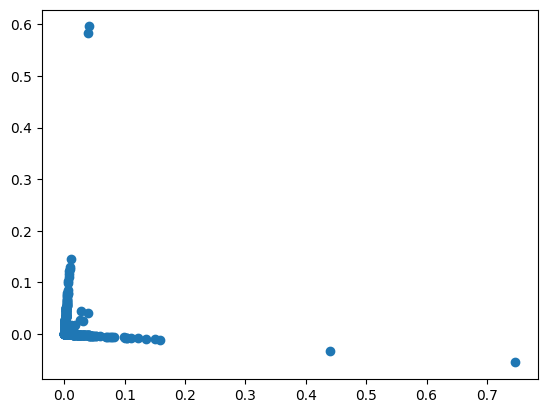

In [54]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

# Example sparse vector (20-dimensional, sparse)
tmp = svd.components_.T

# Plotting the 2D projection
plt.scatter(tmp[:, 0], tmp[:, 1])
plt.show()

cosine sim

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert dictionary to numpy array for vector operations
word_list = list(card_vectors.keys())
vector_array = np.array(list(card_vectors.values()))  # shape (num_words, num_components)

# Compute cosine similarity
cosine_sim_matrix = cosine_similarity(vector_array)

# Display cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=word_list, columns=word_list)


In [46]:
cosine_sim_df.loc[cosine_sim_df.sum(axis=1) == 0].index

Index(['All Out Attack', 'Cloak And Dagger', 'PiercingWail', 'Well Laid Plans',
       'Wraith Form v2', 'Underhanded Strike', 'Crippling Poison',
       'Venomology', 'Night Terror', 'All Out Attack+1', 'Cloak And Dagger+1',
       'PiercingWail+1', 'Well Laid Plans+1', 'Crippling Poison+1'],
      dtype='object')

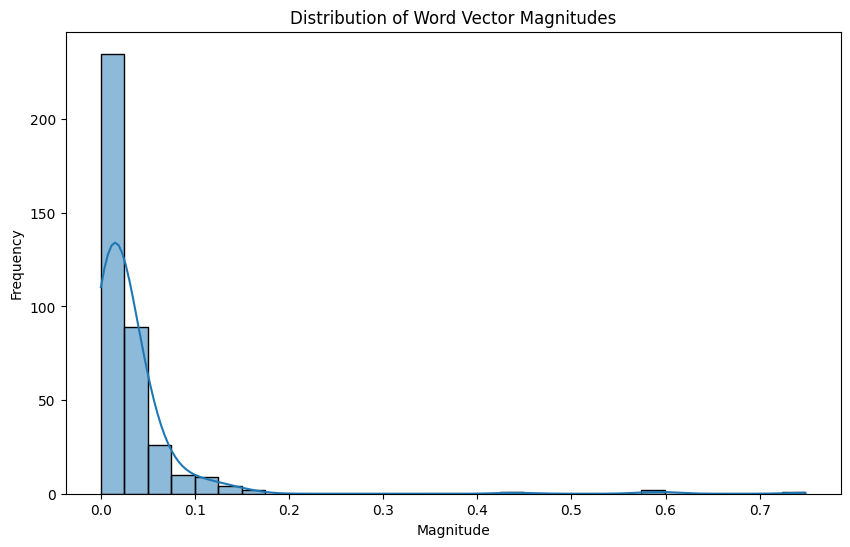

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
vector_magnitudes = np.linalg.norm(vector_array, axis=1)

# Plot histogram of magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(vector_magnitudes, kde=True, bins=30)
plt.title('Distribution of Word Vector Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

In [48]:
from sklearn.metrics.pairwise import cosine_similarity

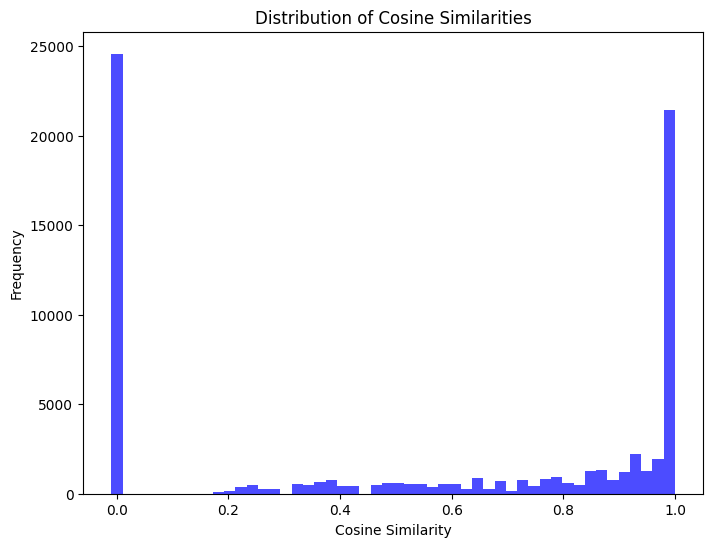

In [49]:
cosine_sim_values = cosine_sim_matrix[np.triu_indices_from(cosine_sim_matrix, k=1)]

# Plot the distribution of cosine similarities
plt.figure(figsize=(8, 6))
plt.hist(cosine_sim_values, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

In [70]:
cosine_sim_values.shape

(71631,)

In [71]:
cosine_sim_values

array([0.99999615, 0.99999839, 0.99999455, ..., 0.99999733, 0.        ,
       0.        ])

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [73]:
cardKmean = KMeans(n_clusters=11, random_state=10,n_init= 50)
cardK = cardKmean.fit_predict(vector_array)

In [74]:
from collections import Counter
counter = Counter(cardK)
sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
print(sorted_counter)

[(5, 164), (0, 74), (3, 57), (10, 40), (6, 17), (7, 11), (8, 8), (9, 4), (2, 2), (4, 1), (1, 1)]


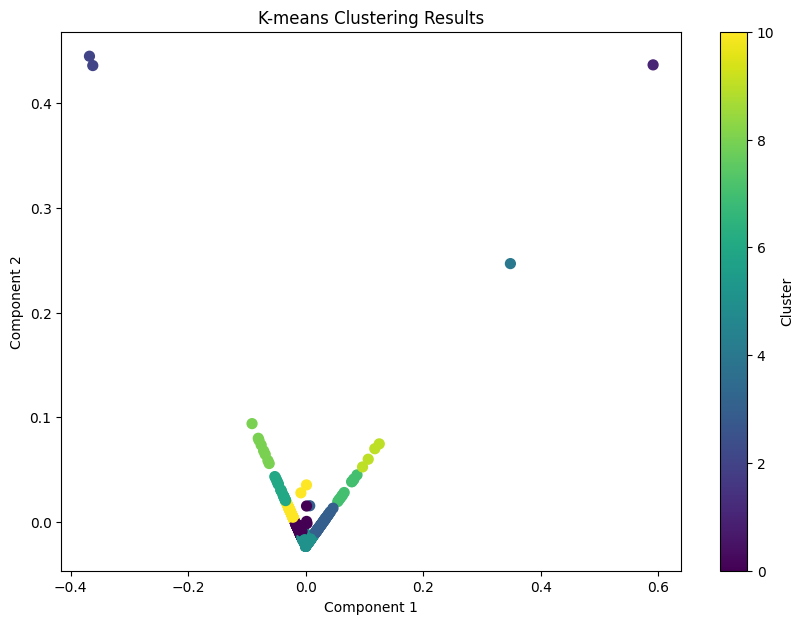

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Assuming cardVect is a numpy array with shape (257, 20)
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vector_array)

plot_data = pca_result

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(plot_data[:, 0], plot_data[:, 1], c=cardK, cmap='viridis', marker='o', s=50)
plt.colorbar(label='Cluster')
plt.title('K-means Clustering Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [53]:
vector_array.shape

(379, 20)

In [33]:
cardSvector = dict( zip(vocab, reduced_matrix))

In [34]:
cardSvector["Underhanded Strike"]

array([ 6.87562712e+00, -4.26829314e-01,  1.90568030e+00,  6.46140812e-03,
       -5.23775249e-01,  1.52529028e+00, -3.49290247e-01, -1.41411849e+00,
        6.87247894e-02, -9.72976087e-01,  1.26018858e-01,  7.15061625e-02,
        3.03267008e-01, -2.23867602e-01,  6.91914570e-01,  1.97284629e-01,
       -3.43057799e-01, -7.08824819e-01,  2.14672972e-02,  3.29197918e-01,
        1.37386434e-01,  9.50830767e-01, -8.02619775e-02,  1.32312055e-01,
        1.31296821e-01, -1.34731352e-02, -1.05500978e-01,  2.46488007e-01,
       -3.40203965e-02,  5.25051584e-02, -3.36481183e-01,  1.03244859e-01,
        5.75076335e-02, -1.41984700e-01,  8.20575094e-02, -5.08393873e-01,
        1.31309953e-01, -4.96572944e-01, -3.70051379e-01,  1.21522271e-02])

In [35]:
from joblib import dump
import os
save_path = os.path.join('matrix_data', 'cardVecTF_MIX_11k_40dim.joblib')
dump(card_vectors, save_path)

['matrix_data\\cardVecTF_MIX_11k_40dim.joblib']